In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd

In [53]:
#https://www.mathsisfun.com/data/least-squares-regression.html
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [6]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

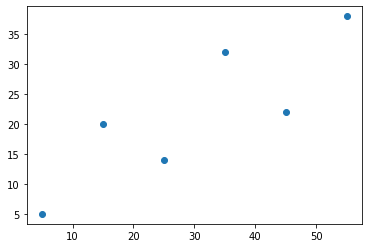

In [7]:
#plot scatter
plt.scatter(x,y)

In [52]:
reg = linear_model.LinearRegression()
reg.fit(x,y)
pred_y = reg.predict(x)
print(reg.coef_)
print(reg.intercept_)
print(pred_y)

[0.54]
5.633333333333333
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


In [38]:
print(x.reshape(1,-1)[0])

[ 5 15 25 35 45 55]


## Implement Ordinary Least Square

In [50]:
def least_square(x,y):
    sum_x = 0
    sum_y = 0
    sum_x2 = 0
    sum_xy = 0
    for i in range(len(x)):
        sum_x += x[i]
        sum_y += y[i]
        sum_x2 += x[i] * x[i]
        sum_xy += x[i] * y[i]

    n = len(x)
    m = (n * (sum_xy) - (sum_x*sum_y)) / (n * (sum_x2) - (sum_x * sum_x))
    b = (sum_y - (m * sum_x)) / n
    return m, b

m,b = least_square(x,y)
y_ls = m*(x.reshape(1,-1)[0]) + b
error = np.subtract(y,y_ls)
print(m,b)
print(y)
print(y_ls)
print(error)

[0.54] [5.63333333]
[ 5 20 14 32 22 38]
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]
[-3.33333333  6.26666667 -5.13333333  7.46666667 -7.93333333  2.66666667]


In [73]:
df = pd.DataFrame(columns=['x','y','y_least_square','y_sklearn_linear'])
df['x'] = x.tolist()
df['y'] = y.tolist()
df['y_least_square'] = y_ls.tolist()
df['y_sklearn_linear'] = pred_y.tolist()
#df['error'] = error
df.head()

,x,y,y_least_square,y_sklearn_linear
0,[5],5,3.435387,8.219970
1,[15],20,10.388804,13.550873
2,[25],14,16.995117,18.881777
3,[35],32,23.998121,24.212681
4,[45],22,30.538318,29.543584


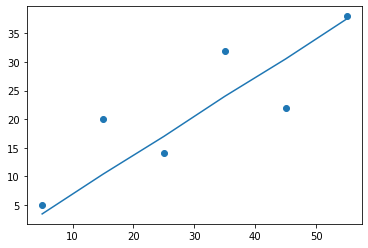

In [74]:
plt.scatter(x,y)
plt.plot(x,y_ls)

## Implement Gradient Descent
#### Mean Squared Error Function

In [75]:
#https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
#The Gradient Descent is a optimization algorithm to find the minimum of a funtion 
#(here we are using Mean squared error function)

In [76]:
#learning rate
L = 0.0001
#number of iterations
epochs = 1000

#number of element in x
n = len(x)

def gradient_descent(epochs, L, x , y):
    #slope
    m = 0
    c = 0
    
    x = x.reshape(1,-1)[0]
    
    for i in range(epochs):
        #predicted y
        y_pred = m*x + c
        #partial derivative of the loss function with respect to m
        D_m = (-2/n) * sum(x*(y-y_pred))
        #partial derivative of the loss function with respect to c
        D_c = (-2/n) * (y-y_pred)
        
        #update m and c
        m = m - L * D_m
        c = c - L * D_c
    return m, c


m,b = gradient_descent(epochs, L, x,y)
y_gd = m*(x.reshape(1,-1)[0]) + b
error = np.subtract(y,y_gd)
print(m,b)
print(y)
print(y_gd)
print(error) 

    

0.6817228359669975 [ 0.05263379  0.32182355 -0.09745987  0.2700832  -0.28033796  0.02163624]
[ 5 20 14 32 22 38]
[ 3.46124797 10.54766609 16.94561103 24.13038246 30.39718966 37.51639222]
[ 1.53875203  9.45233391 -2.94561103  7.86961754 -8.39718966  0.48360778]


In [77]:
df.insert(4,"y_gradient_descent",y_gd)
df.head()

,x,y,y_least_square,y_sklearn_linear,y_gradient_descent
0,[5],5,3.435387,8.219970,3.461248
1,[15],20,10.388804,13.550873,10.547666
2,[25],14,16.995117,18.881777,16.945611
3,[35],32,23.998121,24.212681,24.130382
4,[45],22,30.538318,29.543584,30.397190


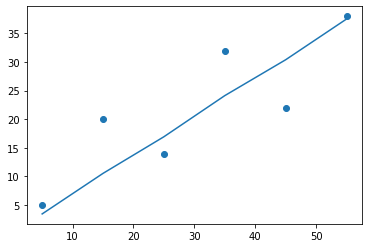

In [78]:
plt.scatter(x,y)
plt.plot(x,y_gd)

## SGDRegressor from sklearn

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [80]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
rng = np.random.RandomState(0)
# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(x, y)
pred_y = reg.predict(x)
print(pred_y)

[ 8.22313255 13.55191068 18.88068882 24.20946695 29.53824508 34.86702322]


In [81]:
df.insert(5,"y_sklearn_SGD",pred_y)
df.head()

,x,y,y_least_square,y_sklearn_linear,y_gradient_descent,y_sklearn_SGD
0,[5],5,3.435387,8.219970,3.461248,8.223133
1,[15],20,10.388804,13.550873,10.547666,13.551911
2,[25],14,16.995117,18.881777,16.945611,18.880689
3,[35],32,23.998121,24.212681,24.130382,24.209467
4,[45],22,30.538318,29.543584,30.397190,29.538245


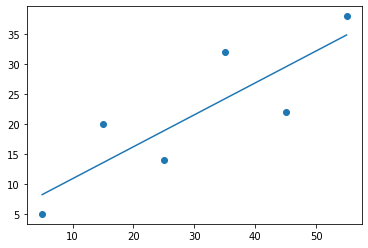

In [82]:
plt.scatter(x,y)
plt.plot(x,pred_y)